In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
import os

In [82]:
font_path = 'C:\\Windows\\Fonts\\simsun.ttc'  # 宋體
font_prop = FontProperties(fname=font_path)

mode = 'show'   # 'show' or 'save'

In [83]:
def plot_d2(waveform, derivative, Name, i, Feature, hands, locate):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    
    plt.plot(waveform)
    plt.plot(derivative[5:1995])
    plt.plot(x[Feature], waveform[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i}th {hands}',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    if mode == 'show':
        plt.show()

In [84]:
def calculate_d2(waveform, derivative, Name, i, mode, hands):
    TDPPG_x = np.where(np.diff(np.sign(derivative)))[0]
    # # 設置最小距離（例如，至少 10 個數據點）
    # min_distance = 30

    # def filter_by_distance(zero_crossings, min_distance):
    #     filtered_crossings = []
    #     last_index = -min_distance  # 初始化為一個遠距離的負數
        
    #     for index in zero_crossings:
    #         if index - last_index >= min_distance:
    #             filtered_crossings.append(index)
    #             last_index = index
        
    #     return np.array(filtered_crossings)

    # # 過濾零點
    # TDPPG_x = filter_by_distance(TDPPG_x, min_distance)

    closest_indices = []

    a_point = np.array(find_peaks(waveform, height=0.6, distance=900)[0])


    for num in a_point:
        differences = np.abs(TDPPG_x - num)
        closest_index = np.argmin(differences)
        closest_indices.append(closest_index)
    if len(closest_indices) < 2:  #判斷抓到兩個周期
        plot_d2(waveform, derivative, Name, i, TDPPG_x, hands, "F:\\TDPPG\\bad signal")
        print(f'{Name}, {i + 1}th',TDPPG_x[closest_indices])
        return 0 
    else:
        TDPPG_x_new = TDPPG_x[closest_indices[0]:closest_indices[0]+6]
        TDPPG_x_new = np.append(TDPPG_x_new, TDPPG_x[closest_indices[1]:closest_indices[1]+6])
        if TDPPG_x_new[6] - TDPPG_x_new[5] < TDPPG_x_new[6] * 0.3 or len(TDPPG_x_new) != 12: #判斷是否抓錯feature
            plot_d2(waveform, derivative, Name, i, TDPPG_x_new, hands, "F:\\TDPPG\\bad signal")
            print(f'{Name}, {i + 1}th {hands} cant find the feature')
            return 0


    if mode =='show':
        plot_d2(waveform,derivative, Name, i, TDPPG_x_new, hands, "F:\\TDPPG")
        print(TDPPG_x_new)

自動
Normal37 329 left


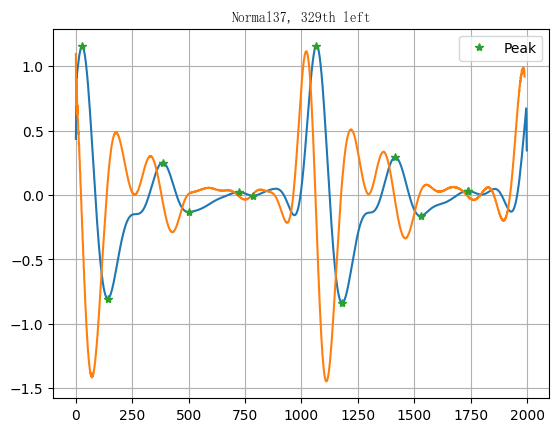

Normal37, 330th left cant find the feature


0

In [92]:
Name = 37
i = 329
hands = 0


if hands == 0:
    hands = 'left'
else:
    hands = 'right'

file = f'F:\\Normal_Signal\\Normal{Name}, {i}th {hands} d2.npy'

#若找不到檔案，換另一個位址
if not os.path.isfile(file):
    print("手工")
    file = f'F:\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d2.npy'

    Name = file.split('\\')[3].split(',')[0]
    i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[3].split(',')[1].split(' ')[2]
else:
    print("自動")
    Name = file.split('\\')[2].split(',')[0]
    i = int(file.split('\\')[2].split(',')[1].split(' ')[1][:-2])
    hand = file.split('\\')[2].split(',')[1].split(' ')[2]
print(Name, i, hand)
data = np.load(file)
d3 = np.gradient(data, axis=0) * 50

calculate_d2(data, d3, Name, i, 'show', hand)
